# Prisma AIRS Interactive Model Security Scanner

**Interactive demonstration** for scanning AI models across multiple platforms

## Supported Platforms

- 🤗 **HuggingFace** - Public model repositories
- ☁️ **Google Cloud Storage** - GCS buckets
- 📦 **AWS S3** - S3 buckets and objects
- 💾 **Local Disk** - Local file paths
- 🔷 **Azure** - Azure Blob Storage

## What You'll Learn

1. ✅ Interactive model scanning across platforms
2. ✅ Understanding scan results and security outcomes
3. ✅ Scan history and analytics with visualizations
4. ✅ Production integration examples
5. ✅ Advanced scanning features

---

## Section 1: Setup & Authentication

<details>
<summary><b>📋 Click to expand setup instructions</b></summary>

Run cells 1-3 once to initialize the scanner. These cells:
1. Import required libraries
2. Configure credentials from environment variables  
3. Initialize the API client and security groups

After running these three cells once, you won't need to run them again unless you restart the kernel.

</details>

---

**Quick Start:** Run the 3 code cells below, then skip to Section 2.

In [1]:
# Import required libraries
import os
from uuid import UUID
from model_security_client.api import ModelSecurityAPIClient
import json
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from IPython.display import display, HTML, clear_output

# Configure plotting
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

print("✓ Libraries imported successfully")

✓ Libraries imported successfully


In [2]:
# Configure credentials from environment variables
CLIENT_ID = os.getenv('MODEL_SECURITY_CLIENT_ID', '')
CLIENT_SECRET = os.getenv('MODEL_SECURITY_CLIENT_SECRET', '')
TSG_ID = os.getenv('TSG_ID', '')

# Set in environment for SDK
if CLIENT_ID and CLIENT_SECRET and TSG_ID:
    os.environ['MODEL_SECURITY_CLIENT_ID'] = CLIENT_ID
    os.environ['MODEL_SECURITY_CLIENT_SECRET'] = CLIENT_SECRET
    os.environ['TSG_ID'] = TSG_ID
    
    print("✓ Credentials configured")
    print(f"  Client ID: {CLIENT_ID[:20]}...")
    print(f"  TSG_ID: {TSG_ID}")
else:
    print("❌ ERROR: Credentials not configured!")
    print("   Set environment variables: MODEL_SECURITY_CLIENT_ID, MODEL_SECURITY_CLIENT_SECRET, TSG_ID")

✓ Credentials configured
  Client ID: AIRS@1016244978.iam....
  TSG_ID: 1016244978


In [3]:
# Initialize Model Security Client
client = ModelSecurityAPIClient(
    base_url="https://api.sase.paloaltonetworks.com/aims"
)

# Define security groups for all platforms
SECURITY_GROUPS = {
    'HuggingFace': UUID('ceb2f363-0166-4872-a44e-f92f684f8a09'),
    'Google Cloud Storage': UUID('d548cfb2-6f85-4b9d-9ec2-3e3ebe16bd2d'),
    'AWS S3': UUID('f1183444-fc7b-4d23-b0da-90331804aa60'),
    'Local Disk': UUID('811e18fe-df5f-4df0-a1c9-80aaf98fa8a1'),
    'Azure': UUID('04f0cd17-631e-49c8-9bda-6bd3ef86a111')
}

print("✓ Model Security client initialized")
print(f"  Base URL: {client.base_url}")
print(f"\n✅ Security groups configured for {len(SECURITY_GROUPS)} platforms")
print(f"\n✅ Ready to scan models!")

✓ Model Security client initialized
  Base URL: https://api.sase.paloaltonetworks.com/aims

✅ Security groups configured for 5 platforms

✅ Ready to scan models!


---

## Section 2: Interactive Model Scanner

**👇 RUN THE CODE CELL BELOW** to display the interactive scanner interface.

After running the cell, you'll see:
- **Platform dropdown** (select HuggingFace, AWS S3, GCS, Azure, or Local)
- **Model URL text field** (paste your model URL)
- **Scan button** (click to start scanning)

<details>
<summary><b>📚 Click to see example URLs by platform</b></summary>

### Example URLs by Platform:

**HuggingFace:**
- `https://huggingface.co/openai-community/gpt2`
- `https://huggingface.co/google-bert/bert-base-uncased`
- `https://huggingface.co/microsoft/DialoGPT-medium`

**AWS S3:**
- `s3://my-bucket/models/my-model.tar.gz`

**Google Cloud Storage:**
- `gs://my-bucket/models/my-model`

**Azure:**
- `https://myaccount.blob.core.windows.net/models/my-model`

**Local Disk:**
- `/path/to/model/directory`

</details>

In [4]:
# Create interactive widgets
platform_dropdown = widgets.Dropdown(
    options=list(SECURITY_GROUPS.keys()),
    value='HuggingFace',
    description='Platform:',
    style={'description_width': 'initial'},
    layout=widgets.Layout(width='400px')
)

model_url_input = widgets.Text(
    value='https://huggingface.co/openai-community/gpt2',
    placeholder='Enter model URL or path',
    description='Model URL:',
    style={'description_width': 'initial'},
    layout=widgets.Layout(width='600px')
)

scan_button = widgets.Button(
    description='🔍 Scan Model',
    button_style='primary',
    tooltip='Click to scan the model',
    icon='search',
    layout=widgets.Layout(width='200px')
)

output_area = widgets.Output()

# Scan function
def on_scan_clicked(b):
    with output_area:
        clear_output()
        
        platform = platform_dropdown.value
        model_uri = model_url_input.value.strip()
        security_group_uuid = SECURITY_GROUPS[platform]
        
        if not model_uri:
            print("❌ Please enter a model URL or path")
            return
        
        print("="*80)
        print(f"🔍 SCANNING MODEL")
        print("="*80)
        print(f"Platform: {platform}")
        print(f"Model: {model_uri}")
        print(f"Security Group: {security_group_uuid}")
        print(f"\nStarted: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")
        print("This may take 30-60 seconds...\n")
        
        try:
            result = client.scan(
                security_group_uuid=security_group_uuid,
                model_uri=model_uri
            )
            
            print("="*80)
            print("✅ SCAN COMPLETE")
            print("="*80)
            
            # Determine outcome color
            outcome_str = str(result.eval_outcome)
            if 'ALLOWED' in outcome_str:
                outcome_emoji = "✅"
                outcome_color = "#22c55e"  # green
                border_color = "#22c55e"
            elif 'BLOCKED' in outcome_str:
                outcome_emoji = "🛑"
                outcome_color = "#ef4444"  # red
                border_color = "#ef4444"
            else:
                outcome_emoji = "⚠️"
                outcome_color = "#f59e0b"  # orange
                border_color = "#f59e0b"
            
            display(HTML(f"""
                <div style="border: 2px solid {border_color}; padding: 20px; border-radius: 10px; margin: 10px 0; background-color: rgba(128,128,128,0.1);">
                    <h3 style="margin-top: 0;">{outcome_emoji} Outcome: <span style="color: {outcome_color}; font-weight: bold;">{outcome_str}</span></h3>
                    <p><strong>Platform:</strong> {platform}</p>
                    <p><strong>Scan ID:</strong> <code style="background-color: rgba(128,128,128,0.2); padding: 2px 6px; border-radius: 3px;">{result.uuid}</code></p>
                    <p><strong>Timestamp:</strong> {result.created_at}</p>
                </div>
            """))
            
            if result.eval_summary:
                total = result.eval_summary.total_rules
                passed = result.eval_summary.rules_passed
                failed = result.eval_summary.rules_failed
                pass_rate = (passed / total * 100) if total > 0 else 0
                
                display(HTML(f"""
                    <div style="border: 1px solid rgba(128,128,128,0.3); padding: 15px; border-radius: 8px; margin: 10px 0; background-color: rgba(128,128,128,0.1);">
                        <h4 style="margin-top: 0;">📊 Rules Summary</h4>
                        <ul style="list-style: none; padding-left: 0;">
                            <li>✅ <strong>Passed:</strong> {passed} / {total} ({pass_rate:.1f}%)</li>
                            <li>❌ <strong>Failed:</strong> {failed} / {total}</li>
                        </ul>
                    </div>
                """))
            
            # Additional details
            print(f"\n📁 Files Scanned: {result.total_files_scanned if hasattr(result, 'total_files_scanned') else 'N/A'}")
            print(f"🔧 Scanner Version: {result.scanner_version if hasattr(result, 'scanner_version') else 'N/A'}")
            
            if hasattr(result, 'model_formats') and result.model_formats:
                print(f"\n📦 Model Formats Detected:")
                for fmt in result.model_formats:
                    print(f"   • {fmt}")
            
            print("\n" + "="*80)
            print("💡 VIEW DETAILED RESULTS")
            print("="*80)
            print("For detailed violation information and remediation steps:")
            print("")
            print("1. Go to: https://strata.paloaltonetworks.com")
            print("2. Navigate to: Insights → Prisma AIRS → Model Security → Scans")
            print(f"3. Search for Scan ID: {result.uuid}")
            
        except Exception as e:
            print("="*80)
            print("❌ SCAN FAILED")
            print("="*80)
            print(f"\nError: {str(e)}")
            print("\nPossible issues:")
            print("  • Invalid model URL or path")
            print("  • Model not accessible")
            print("  • Network/API error")
            print("  • Invalid credentials")
            print("  • Wrong platform selected")

# Attach click handler
scan_button.on_click(on_scan_clicked)

# Display the interface
display(widgets.VBox([
    widgets.HTML('<h3>🔍 Interactive Model Scanner</h3>'),
    platform_dropdown,
    model_url_input,
    scan_button,
    widgets.HTML('<hr>'),
    output_area
]))

print("\n✅ Interactive scanner ready! Select platform, enter URL, and click 'Scan Model'.")


✅ Interactive scanner ready! Select platform, enter URL, and click 'Scan Model'.


---

## Section 3: Batch Scanning Multiple Models

Scan multiple models at once and compare results.

In [5]:
# Test multiple models
test_models = [
    "https://huggingface.co/openai-community/gpt2",
    "https://huggingface.co/google-bert/bert-base-uncased",
    "https://huggingface.co/microsoft/DialoGPT-medium"
]

# Select platform for batch scan
batch_platform = 'HuggingFace'  # Change as needed
batch_security_group = SECURITY_GROUPS[batch_platform]

results = []

print(f"Batch scanning {len(test_models)} models on {batch_platform}...\n")

for model_uri in test_models:
    print(f"Scanning: {model_uri.split('/')[-1]}...")
    
    try:
        result = client.scan(
            security_group_uuid=batch_security_group,
            model_uri=model_uri
        )
        
        results.append({
            'model': model_uri.split('/')[-1],
            'outcome': str(result.eval_outcome),
            'rules_passed': result.eval_summary.rules_passed if result.eval_summary else 0,
            'rules_failed': result.eval_summary.rules_failed if result.eval_summary else 0,
            'scan_id': str(result.uuid)
        })
        
        print(f"  Result: {result.eval_outcome}")
        if result.eval_summary:
            print(f"  Rules: {result.eval_summary.rules_passed} passed, {result.eval_summary.rules_failed} failed")
        
    except Exception as e:
        print(f"  ✗ Error: {str(e)}")
        results.append({
            'model': model_uri.split('/')[-1],
            'outcome': 'ERROR',
            'rules_passed': 0,
            'rules_failed': 0,
            'scan_id': 'N/A'
        })

# Display results as DataFrame
df_results = pd.DataFrame(results)
print("\n" + "="*80)
print("BATCH SCAN RESULTS")
print("="*80)
display(df_results)

Batch scanning 3 models on HuggingFace...

Scanning: gpt2...
  Result: EvalOutcome.BLOCKED
  Rules: 7 passed, 1 failed
Scanning: bert-base-uncased...
  Result: EvalOutcome.BLOCKED
  Rules: 7 passed, 1 failed
Scanning: DialoGPT-medium...
  Result: EvalOutcome.BLOCKED
  Rules: 7 passed, 1 failed

BATCH SCAN RESULTS


,model,outcome,rules_passed,rules_failed,scan_id
0,gpt2,EvalOutcome.BLOCKED,7,1,c385b055-b54c-402b-8dab-a7a5f628c12b
1,bert-base-uncased,EvalOutcome.BLOCKED,7,1,577ee77b-4714-4bee-a93e-ef50c1ad15fe
2,DialoGPT-medium,EvalOutcome.BLOCKED,7,1,84066fc3-8845-4242-951c-51a17f3d7758


---

## Section 4: Scan History & Analytics

View recent scan history with visualizations.

In [6]:
# List recent scans
scans_response = client.list_scans(limit=20)
scans = scans_response.scans

print(f"Retrieved {len(scans)} recent scan(s)\n")

# Create DataFrame for analysis
scans_data = []
for scan in scans:
    scans_data.append({
        'Scan ID': str(scan.uuid)[:8] + '...',
        'Model': scan.model_uri.split('/')[-1] if hasattr(scan, 'model_uri') else 'N/A',
        'Outcome': str(scan.eval_outcome),
        'Rules Passed': scan.eval_summary.rules_passed if hasattr(scan, 'eval_summary') and scan.eval_summary else 0,
        'Rules Failed': scan.eval_summary.rules_failed if hasattr(scan, 'eval_summary') and scan.eval_summary else 0,
        'Timestamp': scan.created_at if hasattr(scan, 'created_at') else None
    })

scans_df = pd.DataFrame(scans_data)
display(scans_df.head(10))

Retrieved 20 recent scan(s)



,Scan ID,Model,Outcome,Rules Passed,Rules Failed,Timestamp
0,84066fc3...,DialoGPT-medium,EvalOutcome.BLOCKED,7,1,2025-11-06 02:33:53.649207+00:00
1,577ee77b...,bert-base-uncased,EvalOutcome.BLOCKED,7,1,2025-11-06 02:33:51.810718+00:00
2,c385b055...,gpt2,EvalOutcome.BLOCKED,7,1,2025-11-06 02:33:49.584380+00:00
3,dbad8ae8...,gpt2,EvalOutcome.BLOCKED,7,1,2025-11-06 02:24:32.641863+00:00
4,b509da9b...,opt-125m,EvalOutcome.BLOCKED,7,1,2025-11-06 02:24:23.306747+00:00
5,4439ec99...,DialoGPT-medium,EvalOutcome.BLOCKED,7,1,2025-11-06 02:22:21.580953+00:00
6,29d1d70d...,bert-base-uncased,EvalOutcome.BLOCKED,7,1,2025-11-06 02:22:19.613668+00:00
7,2a3b6c62...,gpt2,EvalOutcome.BLOCKED,7,1,2025-11-06 02:22:17.506214+00:00
8,e79b33ff...,gpt2,EvalOutcome.BLOCKED,7,1,2025-11-06 02:21:46.606225+00:00
9,805678bd...,granite-4.0-h-1b,EvalOutcome.ALLOWED,8,0,2025-11-05 20:55:24.798611+00:00


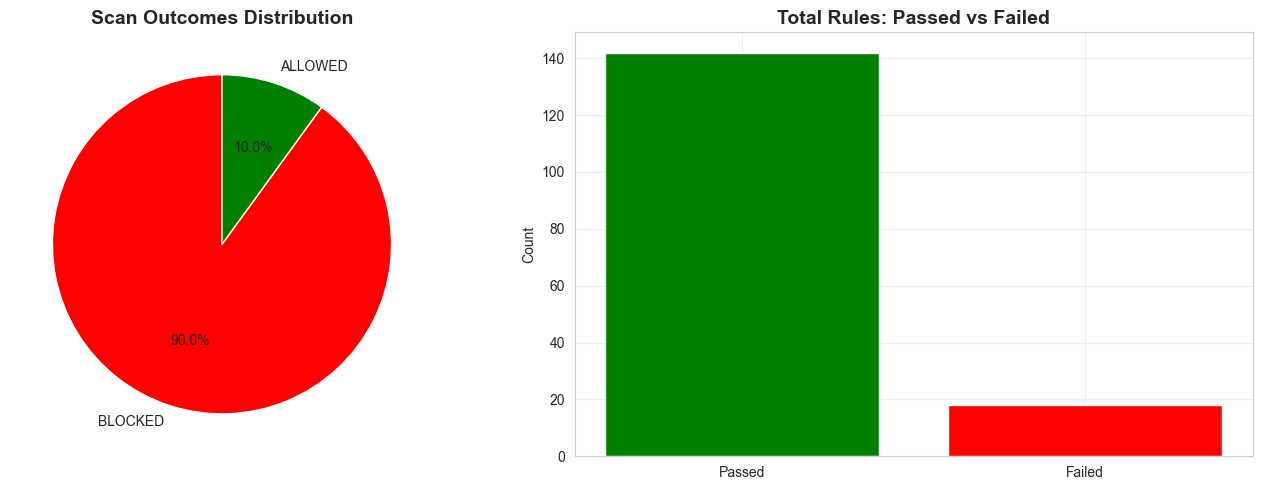

In [11]:
# Visualize scan outcomes
if len(scans_df) > 0:
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
    
    # Outcome distribution
    outcome_counts = scans_df['Outcome'].value_counts()
    colors = {'EvalOutcome.ALLOWED': 'green', 'EvalOutcome.BLOCKED': 'red', 'EvalOutcome.WARNING': 'orange'}
    pie_colors = [colors.get(str(outcome), 'gray') for outcome in outcome_counts.index]
    
    ax1.pie(outcome_counts.values, labels=[str(o).replace('EvalOutcome.', '') for o in outcome_counts.index], 
            autopct='%1.1f%%', colors=pie_colors, startangle=90)
    ax1.set_title('Scan Outcomes Distribution', fontsize=14, fontweight='bold')
    
    # Rules passed vs failed
    rules_data = scans_df[['Rules Passed', 'Rules Failed']].sum()
    ax2.bar(['Passed', 'Failed'], rules_data.values, color=['green', 'red'])
    ax2.set_title('Total Rules: Passed vs Failed', fontsize=14, fontweight='bold')
    ax2.set_ylabel('Count')
    
    plt.tight_layout()
    plt.show()
else:
    print("No scan data available for visualization")

---

## Section 5: Advanced Scanning Features

In [8]:
# Scan with custom filters (only scan specific file types)
model_uri = "https://huggingface.co/facebook/opt-125m"

print(f"Scanning with file filters: {model_uri}")
print("  Only scanning: *.bin, *.json")
print("  Ignoring: *.md, *.txt")
print()

result = client.scan(
    security_group_uuid=SECURITY_GROUPS['HuggingFace'],
    model_uri=model_uri,
    allow_patterns=["*.bin", "*.json"],
    ignore_patterns=["*.md", "*.txt"]
)

print(f"Result: {result.eval_outcome}")
print(f"Files scanned: {result.total_files_scanned if hasattr(result, 'total_files_scanned') else 'N/A'}")

Scanning with file filters: https://huggingface.co/facebook/opt-125m
  Only scanning: *.bin, *.json
  Ignoring: *.md, *.txt

Result: EvalOutcome.BLOCKED
Files scanned: 6


---

## Section 6: Production Integration Example

Example function for CI/CD pipeline integration.

In [9]:
# CI/CD Integration Function
def validate_model_for_deployment(model_uri, platform='HuggingFace', blocking=True):
    """
    Validate a model before deployment.
    
    Args:
        model_uri: Model URL or path
        platform: Platform name (HuggingFace, AWS S3, etc.)
        blocking: If True, fail on violations. If False, warn only.
    
    Returns:
        tuple: (is_safe, scan_result)
    """
    print(f"🔍 Validating: {model_uri}")
    print(f"   Platform: {platform}")
    
    try:
        security_group_uuid = SECURITY_GROUPS[platform]
        result = client.scan(
            security_group_uuid=security_group_uuid,
            model_uri=model_uri
        )
        
        # Check if model is allowed
        is_safe = str(result.eval_outcome) == 'EvalOutcome.ALLOWED'
        
        if is_safe:
            print("✅ Model PASSED security validation")
            print("   Safe to deploy")
        else:
            print("❌ Model FAILED security validation")
            if result.eval_summary:
                print(f"   Rules failed: {result.eval_summary.rules_failed}/{result.eval_summary.total_rules}")
            
            if blocking:
                print("   🛑 DEPLOYMENT BLOCKED")
            else:
                print("   ⚠️  DEPLOYMENT ALLOWED WITH WARNING")
        
        print(f"   Scan ID: {result.uuid}")
        
        return (is_safe if blocking else True), result
        
    except Exception as e:
        print(f"❌ Scan error: {str(e)}")
        if blocking:
            print("   🛑 DEPLOYMENT BLOCKED (scan failure)")
            return False, None
        else:
            print("   ⚠️  DEPLOYMENT ALLOWED (scan failure, non-blocking)")
            return True, None

# Test the function
print("="*80)
print("PRODUCTION DEPLOYMENT VALIDATION EXAMPLE")
print("="*80)
print()

can_deploy, scan_result = validate_model_for_deployment(
    model_uri="https://huggingface.co/openai-community/gpt2",
    platform='HuggingFace',
    blocking=True
)

print(f"\n📊 Deployment Decision: {'APPROVED ✅' if can_deploy else 'REJECTED ❌'}")

PRODUCTION DEPLOYMENT VALIDATION EXAMPLE

🔍 Validating: https://huggingface.co/openai-community/gpt2
   Platform: HuggingFace
❌ Model FAILED security validation
   Rules failed: 1/8
   🛑 DEPLOYMENT BLOCKED
   Scan ID: 49512aa4-bb32-45e7-bc09-399754c647e1

📊 Deployment Decision: REJECTED ❌


---

## Section 7: Export Scan Results

In [10]:
# Export recent scans to CSV
output_file = "scan_results_export.csv"
scans_df.to_csv(output_file, index=False)
print(f"✓ Scan results exported to: {output_file}")

# Export to JSON
json_file = "scan_results_export.json"
scans_df.to_json(json_file, orient='records', indent=2)
print(f"✓ Scan results exported to: {json_file}")

✓ Scan results exported to: scan_results_export.csv
✓ Scan results exported to: scan_results_export.json


---

## Summary & Next Steps

### What We Covered

✅ Interactive scanning across 5 platforms (HuggingFace, AWS S3, GCS, Azure, Local)  
✅ Platform-specific security group selection  
✅ Batch scanning multiple models  
✅ Scan history and analytics with visualizations  
✅ Advanced features (filters, timeouts)  
✅ Production deployment validation  
✅ Exporting results to CSV/JSON  

### Key Learnings

1. **Platform-Specific Security Policies** - Different security groups for each platform
2. **SDK Returns Summary Only** - Detailed violations visible in Strata Cloud Manager
3. **BLOCKED ≠ Malicious** - Models blocked for policy violations (license, format, security)
4. **Rules Configurable** - Adjust security groups for different risk tolerances
5. **Scanner Works Fast** - Most scans complete in 30-60 seconds
6. **Production Ready** - Can gate deployments based on scan results

### View Detailed Results

📊 **Strata Cloud Manager:** https://strata.paloaltonetworks.com  
📍 **Navigate to:** Insights → Prisma AIRS → Model Security → Scans

### Supported Platforms

| Platform | URL Format | Example |
|----------|------------|----------|
| **HuggingFace** | `https://huggingface.co/org/model` | `https://huggingface.co/openai-community/gpt2` |
| **AWS S3** | `s3://bucket/path` | `s3://my-bucket/models/model.tar.gz` |
| **Google Cloud Storage** | `gs://bucket/path` | `gs://my-bucket/models/my-model` |
| **Azure** | `https://account.blob.core.windows.net/...` | `https://myaccount.blob.core.windows.net/models/model` |
| **Local Disk** | `/absolute/path` | `/home/user/models/my-model` |

### Next Steps

1. **Review scan details** in Strata Cloud Manager
2. **Adjust security group rules** for your risk tolerance
3. **Scan your own models** across different platforms
4. **Integrate into CI/CD** pipeline using the validation function
5. **Set up automated scanning** for production deployments

---

**Questions?** Contact your Palo Alto Networks representative or visit the [Prisma AIRS documentation](https://docs.paloaltonetworks.com/prisma/prisma-cloud/prisma-cloud-admin-compute/runtime_defense/ai_runtime_security).